# Assignment 2

In [1]:
"author: Rafi Martirosyan"

'author: Rafi Martirosyan'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Extra Task
Implement matrix multiplication of two matrices

In [3]:
def matrix_multiplication(x, y):
    result = np.zeros((len(x), len(y[0])))
    
    for i in range(len(x)):
       for j in range(len(y[0])):
           for k in range(len(y)):
               result[i][j] += x[i][k] * y[k][j]
    
    return result

### Extra Task
Implement Hadamard product of two matrices

In [4]:
def hadamard_product(x, y):
    result = np.zeros((len(x), len(x[0])))
    
    for i in range(len(x)):
       for j in range(len(x[0])):
           result[i][j] = x[i][j] * y[i][j]
    
    return result

### Data 

#### Please use HW_gender data from Assignment 1. Use the weight to predict the height of a person. You can try different variants: per gender or for overall data. Please argue why did you prefer one variant over another in the report. 

In [5]:
data = pd.read_csv("HW_gender.csv")

# Linear Regression 

### Implement "loss" function
### Implement "fit" function gradient descent 
### Implement "predict" function gradient descent 

In [6]:
class LinearRegression():
    
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate 
        self.iterations = iterations
        self.history = []
                 
    def fit(self, X, Y):
        self.m, self.n = X.shape
          
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
                  
        for i in range(self.iterations):
            self.update_weights()
              
        return self
       
    def update_weights(self):  
        Y_pred = self.predict(self.X)
          
        dW = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m 
          
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
        self.history.append(self.mse())
        
        return self
      
    def predict(self, X):
        return X.dot(self.W) + self.b 
    
    def mse(self):
        return np.mean((self.predict(self.X) - self.Y) ** 2) / 2
    
x = data.iloc[:, 1:2].values
y = data.iloc[:,2].values

def get_model(learning_rate):    
    model = LinearRegression(iterations = 100000, learning_rate = learning_rate)

    model.fit(x / 100, y / 100)
    model.b *= 100
    
    return model

model = get_model(0.1)
print(model.W, model.b)

[7.71728763] -350.7371912599485


### Depict the plot of loss over iterations
 

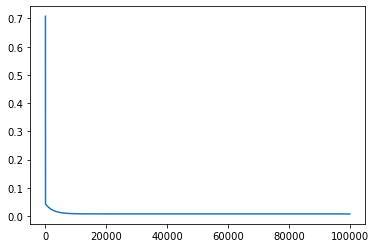

In [7]:
def loss_plot(model):
    plt.plot(range(len(model.history)), model.history)
    plt.show()
    
loss_plot(model)

### Choose the "learning rate" value, show the comparison to other values via loss plot
 

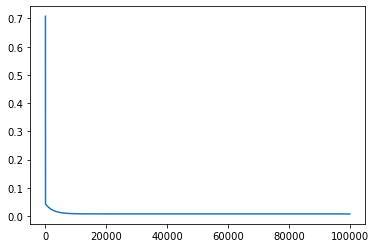

In [ ]:
loss_plot(model)

model2 = get_model(0.01)
loss_plot(model2)

model3 = get_model(0.001)
loss_plot(model3)

### Plot the regression line you have found
 

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = plt.subplot()
ax.scatter(x, y)

y2 = x * model.W + model.b
ax.plot(x, y2, c = 'red')